# **K_means**

In [4]:
from skimage import io
import numpy as np
import numpy.matlib

image = io.imread('/content/bird.tiff')

ModuleNotFoundError: No module named 'skimage'

In [ ]:
#normalization
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)
K = 16 #number of clusters
max_iters = 50 #number of times the k-mean should run

In [ ]:
import random
def initial_center(X,K):
    c = random.sample(list(X),K)
    return c
initial_center(X,K)

[array([0.41176471, 0.42352941, 0.21568627]),
 array([0.80784314, 0.76862745, 0.49803922]),
 array([1.        , 0.85098039, 0.72941176]),
 array([0.75686275, 0.76470588, 0.67058824]),
 array([1.        , 0.82352941, 0.74509804]),
 array([0.12156863, 0.1254902 , 0.13333333]),
 array([0.82745098, 0.63529412, 0.3372549 ]),
 array([0.31372549, 0.33333333, 0.34901961]),
 array([0.10588235, 0.1254902 , 0.09803922]),
 array([0.74117647, 0.65098039, 0.47843137]),
 array([0.84313725, 0.59607843, 0.22352941]),
 array([0.38039216, 0.30196078, 0.20392157]),
 array([0.98431373, 0.82352941, 0.70588235]),
 array([0.16470588, 0.24705882, 0.11764706]),
 array([0.78431373, 0.69019608, 0.68235294]),
 array([1.        , 0.96470588, 0.83529412])]

In [ ]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [ ]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [ ]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [ ]:
initial_centroids = initial_center(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids),"shape(centroids)")
print(np.shape(idx),"shape(idx)")

(16, 3) shape(centroids)
(289444,) shape(idx)


In [ ]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (image.shape[0], image.shape[1], 3))
print(np.shape(X_recovered))

(289444, 3)
(538, 538, 3)


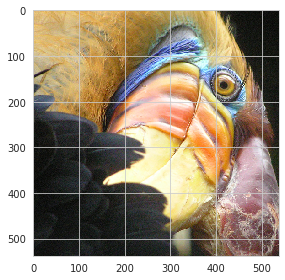

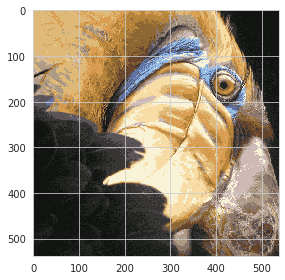

In [ ]:
import matplotlib.pyplot as plt
io.imshow(image)
io.show()

plt.figure()
io.imshow(X_recovered)
io.show()

# **GMM**

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


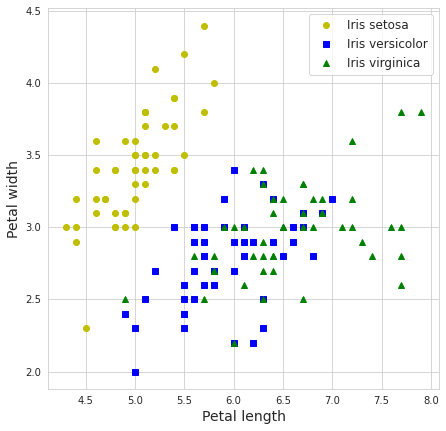

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(y)
print(data.target_names)
plt.figure(figsize=(7,7))
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.show()

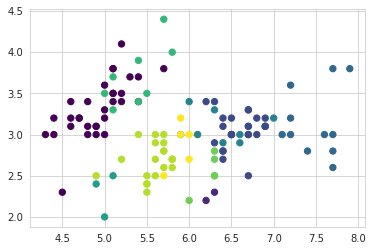

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

gmm = GMM(n_components=10).fit(X_train)
labels = gmm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');


In [ ]:
size = 5
window_pro = []
gaussi = np.array(gaussi)
for i in range(gaussi.shape[0]):
    win = []
    for j in range(gaussi.shape[1] - (size-1)):
        split = gaussi[i, j : j+size]   # 0-5 , 1-6 , 2-7 ,....
        win.append(np.sum(split))
    window_pro.append(win)
window_pro = np.array(window_pro)
print(window_pro.shape)

from sklearn.metrics import accuracy_score
accuracy_score(labels,y_test)


NameError: ignored

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
clf=GMM(n_components=len(np.unique(y)), covariance_type='full')
scores = cross_val_score(clf, X, y, cv=5)

NameError: name 'y' is not defined